In [2]:
import requests

import cv2
from matplotlib import pyplot as plt 
import numpy as np

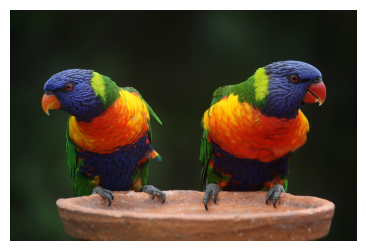

In [3]:
# URL of the image
#

image = cv2.imread('data/images/parrots.jpg')
# opencv reads image in BGR format but matplot lib expects it in RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,3))
plt.imshow(image)#, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
image[10,20]

array([15, 22, 14], dtype=uint8)

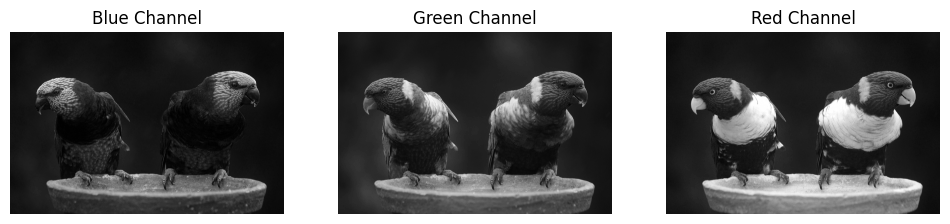

In [5]:
import cv2
from matplotlib import pyplot as plt

# Read the image using cv2
image_path = 'data/images/parrots.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Split the image into its three color channels (BGR format)
blue_channel, green_channel, red_channel = cv2.split(image)

# Display each channel separately using Matplotlib in Jupyter Lab
plt.figure(figsize=(12, 6))

# Display the Blue channel
plt.subplot(131)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(132)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(133)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.show()


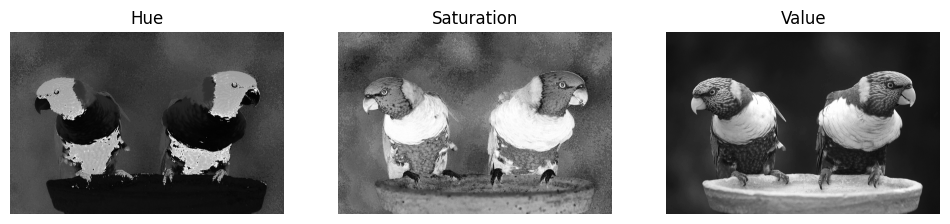

In [5]:
import cv2
from matplotlib import pyplot as plt

# Read the image using cv2
image_path = 'data/images/parrots.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into its three color channels (HSV format)
hue_channel, saturation_channel, value_channel = cv2.split(image)

# Display each channel separately using Matplotlib in Jupyter Lab
plt.figure(figsize=(12, 6))

# Display the Blue channel
plt.subplot(131)
plt.imshow(hue_channel, cmap='gray')
plt.title('Hue')
plt.axis('off')

# Display the Green channel
plt.subplot(132)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation')
plt.axis('off')

# Display the Red channel
plt.subplot(133)
plt.imshow(value_channel, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.show()


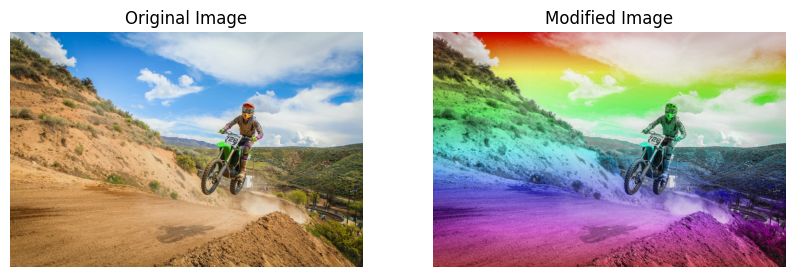

In [15]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2
image = cv2.imread('data/images/motorbike.jpeg')

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its three channels
hue_channel, saturation_channel, value_channel = cv2.split(image_hsv)

#  Modify the channel [hue range is [0,179] in opencv]
#modified_channel = np.clip(1.5 * saturation_channel, 0, 255).astype(np.uint8)
#modified_channel = np.clip(1.5 * value_channel, 0, 255).astype(np.uint8)
modified_channel = np.repeat(np.linspace(0,179,image.shape[0]).reshape(-1,1), image.shape[1], 1).astype(np.uint8)
#modified_channel = 80*np.ones(image.shape[0:2]).astype(np.uint8)

# Merge the modified channels back into an HSV image
#modified_hsv_image = cv2.merge([hue_channel, modified_channel, value_channel])
#modified_hsv_image = cv2.merge([hue_channel, saturation_channel, modified_channel])
modified_hsv_image = cv2.merge([modified_channel, saturation_channel, value_channel])

# Convert the modified HSV image back to BGR color space
modified_image = cv2.cvtColor(modified_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and modified images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.show()


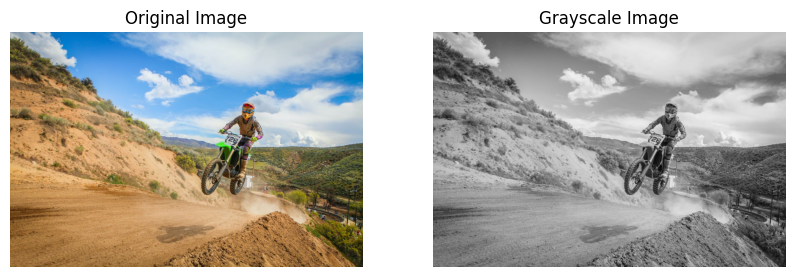

In [7]:
# Read the image using cv2
image = cv2.imread('data/images/motorbike.jpeg')

# Convert the image to HSV color space
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and modified images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap = 'gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

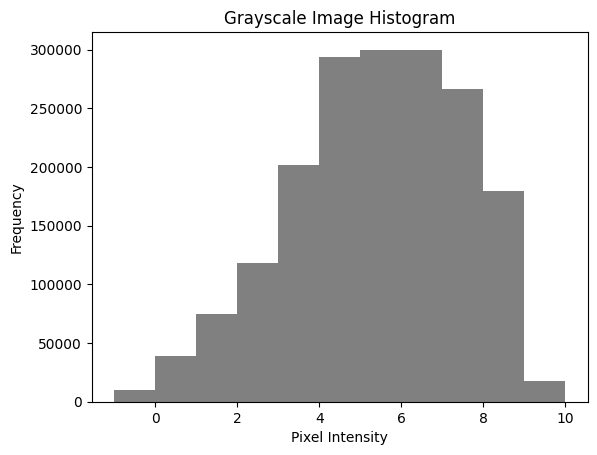

In [8]:
# Read the image
image = cv2.imread('data/images/motorbike.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
bins = 10

#cv2.calcHist([img], channels, mask, bins, ranges)
hist = cv2.calcHist([image], [0], None, [bins], [0, 255]) # histogram of blue
#hist = cv2.calcHist([image], [1], None, [bins], [0, 256]) # histogram of green
#hist = cv2.calcHist([image], [2], None, [bins], [0, 256]) # histogram of red

# numpy histogram function can also be used
#hist, bin_edges = np.histogram(image, bins=25)

# Plot the histogram
plt.bar(range(bins), hist.flatten(), width=2.0, color='gray')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
